<a href="https://colab.research.google.com/github/Kurt9806/Seismic-analysis/blob/main/Espectro_de_Respuesta_Pisco_2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subir los datos del acelerograma

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Acelerograma.csv')
df['EW'] = df['EW']/100
df['NS'] = df['NS']/100
df['UD'] = df['UD']/100

# Metodo de Aproximacion de Carga

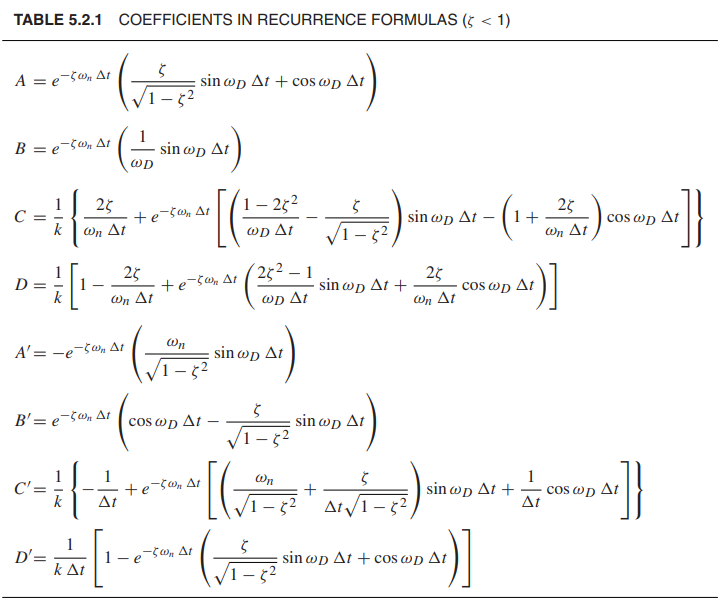

In [ ]:
# Metodo numerico - Metodo de Aproximacion de Fuerzas
def Aprox_Fuerzas(k,xi,m,wn,E,dt,T):
  e = math.e**(-xi*wn*dt)
  wd = wn*math.sqrt(1-xi**2)

  A = e*(xi/math.sqrt(1-xi**2)*math.sin(wd*dt)+math.cos(wd*dt))
  B = e*(1/wd*math.sin(wd*dt))
  C = 1/k*(2*xi/(wn*dt)+e*(((1-2*xi**2)/(wd*dt)-xi/(math.sqrt(1-xi**2)))*math.sin(wd*dt)-(1+2*xi/(wn*dt))*math.cos(wd*dt)))
  D = 1/k*(1-2*xi/(wn*dt)+e*((2*xi**2-1)/(wd*dt)*math.sin(wd*dt)+2*xi/(wn*dt)*math.cos(wd*dt)))
  A_ = -e*(wn/math.sqrt(1-xi**2)*math.sin(wd*dt))
  B_ = e*(math.cos(wd*dt)-xi/math.sqrt(1-xi**2)*math.sin(wd*dt))
  C_ = 1/k*(-1/dt+e*((wn/math.sqrt(1-xi**2)+xi/(dt*math.sqrt(1-xi**2)))*math.sin(wd*dt)+1/dt*math.cos(wd*dt)))
  D_ = 1/(k*dt)*(1-e*(xi/math.sqrt(1-xi**2)*math.sin(wd*dt)+math.cos(wd*dt)))

  # Definiendo la fuerza
  u = np.zeros(len(T))
  u_ = np.zeros(len(T))

  for i in range(len(T)-1):
    u[i+1] = A*u[i] + B*u_[i] + C*(m*9.81*E[i]) + D*(m*9.81*E[i+1])
    u_[i+1] = A_*u[i] + B_*u_[i] + C_*(m*9.81*E[i]) + D_*(m*9.81*E[i+1])

  return u, u_

# Calculo del espectro

In [ ]:
# Condiciones iniciales
m=1
dt = df['T'][1] - df['T'][0]
T = np.arange(0.01,3,dt)
omega_n = 2*math.pi/T
K = m*omega_n*omega_n
XI = [0.001,0.01,0.1,0.2,0.5,0.8]

D = np.zeros((len(T),len(XI)))
for i in range(len(XI)):
  for j in range(len(T)):
    wn = omega_n[j]
    k = K[j]
    [u, v] = Aprox_Fuerzas(k,xi,m,wn,df['NS'],dt,T)
    D[j,i] = max(abs(u))

In [ ]:
Df = pd.DataFrame.from_dict({'0.001':D[:,0],'0.01':D[:,1],'0.1':D[:,2],'0.2':D[:,3],'0.8':D[:,-1]})
print(Df)

        0.001      0.01       0.1       0.2       0.8
0    0.000004  0.000004  0.000004  0.000004  0.000004
1    0.000018  0.000018  0.000018  0.000018  0.000018
2    0.000040  0.000040  0.000040  0.000040  0.000040
3    0.000072  0.000072  0.000072  0.000072  0.000072
4    0.000110  0.000110  0.000110  0.000110  0.000110
..        ...       ...       ...       ...       ...
294  0.029137  0.029137  0.029137  0.029137  0.029137
295  0.029252  0.029252  0.029252  0.029252  0.029252
296  0.029367  0.029367  0.029367  0.029367  0.029367
297  0.029479  0.029479  0.029479  0.029479  0.029479
298  0.029591  0.029591  0.029591  0.029591  0.029591

[299 rows x 5 columns]


In [ ]:
# Calcular la pseudo velocidad y la pseudo aceleracion
V = pd.DataFrame.from_dict({'0':np.zeros(len(T))})
A = pd.DataFrame.from_dict({'0':np.zeros(len(T))})

for i,xi in enumerate(XI):
  V[xi] = omega_n*D[:,i]
  A[xi] = omega_n*omega_n*D[:,i]

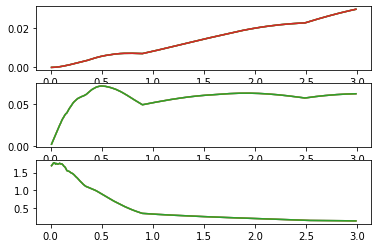

In [ ]:
# Plot figures
plt.title('Espectros de respuesta del sismo de Pisco 2007')
plt.subplot(3,1,1)
plt.plot(T,Df['0.001'])
plt.plot(T,Df['0.01'])
plt.plot(T,Df['0.2'])
plt.plot(T,Df['0.8'])
plt.subplot(3,1,2)
plt.plot(T,V[0.01])
plt.plot(T,V[0.1])
plt.plot(T,V[0.8])
plt.subplot(3,1,3)
plt.plot(T,A[0.01])
plt.plot(T,A[0.1])
plt.plot(T,A[0.8])

In [ ]:
A.to_excel('Pseudoaceleracion Pisco.xlsx')